In [53]:
import pandas as pd
from utils import *
import plotly.express as px
import plotly

In [54]:
df = pd.read_csv("M.csv") \
    .pipe(clean_data)  \
    .pipe(return_casa_movements) \
    .assign(MaxDate = lambda df: pd.to_datetime((df.Date.max() - datetime.timedelta(days=0)).date()),
            MinDate = lambda df: pd.to_datetime((df.Date.min() - datetime.timedelta(days=0)).date())) \
    .query("Date.between(MinDate, MaxDate)") \
    .assign(MaxDate = lambda df: pd.to_datetime((df.Date.max() - datetime.timedelta(days=0)).date())) \
    .groupby(["Tipo", "Categoria", "Subcategoria", "Beneficiario"], as_index = False).Importe.sum() \
    .assign(AbsoluteImporte = lambda df: df.Importe.abs()) \
    .query("not (Tipo == 'Gastos' and Importe > 0)")

In [55]:
df.query("Categoria.isnull() or Subcategoria.isnull() or Beneficiario.isnull()")

,Tipo,Categoria,Subcategoria,Beneficiario,Importe,AbsoluteImporte


In [56]:
df.query("(Tipo == 'Ingresos' and Importe <0) or (Tipo == 'Gastos' and Importe > 0)")

,Tipo,Categoria,Subcategoria,Beneficiario,Importe,AbsoluteImporte


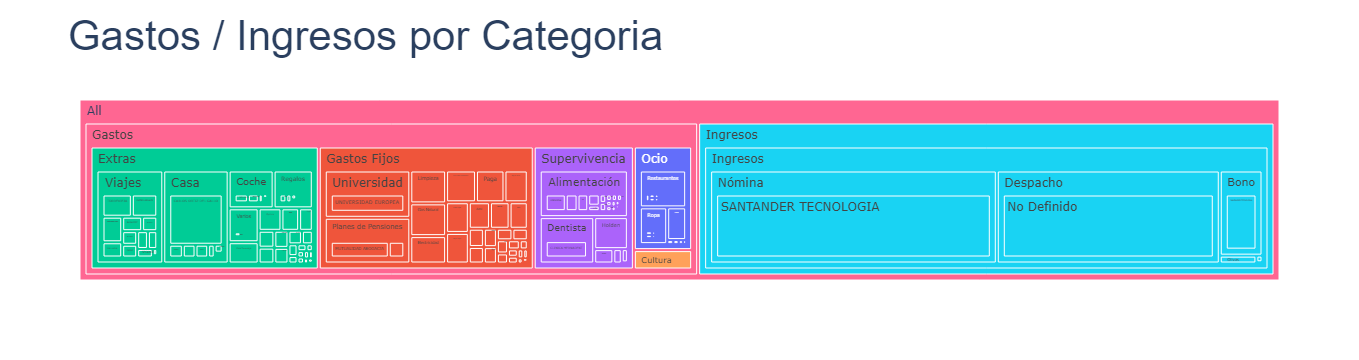

In [57]:
fig = px.treemap(df,
            path=[px.Constant('All'), 'Tipo', 'Categoria', 'Subcategoria', 'Beneficiario'],
            values = "AbsoluteImporte",
            color = "Categoria",
            title="Gastos / Ingresos por Categoria"
)
# fig.update_traces(root_color="lightgrey")
fig.update_layout(
        title_font_size=42,
        title_font_family="Arial"
    )